In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Enakomerno časovno vzorčenje in frekvenčno prekrivanje

Pri procesiranju merjenih podatkov imamo opravka z diskretno vzorčenimi signali. Pomembno se je zavedati lastnosti procesa diskretizacije sicer zveznih časovnih signalov, katerega osnove si bomo pogledali na tej vaji.

## Naloga

:::{admonition} Domača naloga
:class: warning

Z uporabo generatorja signalov in zajemnega sistema Arduino pripravite signal(e), s katerim boste demonstrirali v podatkih določeno lastnost diskretizacije signalov. Pri generiranju in zajemu signalov uporabite v podatkih predpisane parametre, manjkajoče parametre pa določite v skladu s predpisano lastnostjo diskretizacije.

**Dodatek**: Signal(e) pripravite tako, da boste lahko prikazali tudi drugo od obravnavanih lastnosti diskretizacije (*časovno vzorčenje* oz. *kvantizacija*). Tudi to na kratko komentirajte.

LabView program za zajem signalov lahko prenesete v obliki {download}`zip arhiva<./data/03/labview_zajem.zip>`.

*Da bo delo na generatorju signalov potekalo čimbolj učinkovito, lahko izbrane parametre signala in zajema najprej preizkusite z numerično simulacijo. Pomagajte si z zgornjimi primeri in modulom `scipy.signal`.*

Pripravite kratko poročilo v okolju Jupyter Notebook *(od 3 do 10 celic s kodo)*, v katerem naj bodo razvidni podatki naloge ter prikazan vpliv določene lastnosti diskretizacije s kratkimi komentarji, podprtimi s teoretičnimi izhodišči.

Poročilo oddajte v `.pdf` obliki (glejte [navodila za oddajo domačih nalog](intro-domace-naloge)).



:::

---

## Diskretizacija signalov

Diskretizacija je postopek, pri katerem v času zvezno spremenljivko pretvorimo v diskretne vrednosti, primerne za predstavitev v računalniškem pomnilniku. Sestavljata jo dva ločena procesa, **vzorčenje** in **kvantizacija**.

### Enakomerno časovno vzorčenje

Vzorčenje je postopek diskretizacije *neodvisne spremenljivke* (časa) zveznega procesa. 

Glavni parameter časovnega vzorčenja je **interval (perioda) vzorčenja**, $\Delta t$, ki definira **frekvenco vzorčenja**, $f_s = 1 / \Delta t$.

Zvezni časovni signal tako vzorčimo pri diskretnih vrednostih časa $n \, \Delta t$.

:::{note}
Spomnimo se: **Fourierova transformacija** signala $x(t)$, vzorčenega s periodo $\Delta t$ je definirana kot vsota:

$$
X_s(f)=\sum_{n=-\infty}^{+\infty}\,x(n\,\Delta t)\,e^{-\textrm{i}\,2\pi\,f\,n\,\Delta t}
$$

in je v frekvenčni domeni periodična s frekvenco $1/\Delta t$:

$$
X_s(f)=X_s(f+r/\Delta t), \qquad \textrm{kjer je:}\quad r\in \mathbb{Z}.
$$
:::

### Frekvenčno prekrivanje (*aliasing*)

Posledica periodičnosti Fourierove transformacije diskretnega signala je, da so frekvenčne komponente signla, višje od $f_s/2$, zrcaljene preko meje $f_s/2$ in povzročajo t. i. **frekvenčno prekrivanje**. To povzroča anomalije v diskretno vzorčenem signalu.

Frekvenco $f_N = f_s / 2$ imenujemo tudi *Nyquistova frekvenca*.

:::{note}
Pojav frekvenčnega prekrivanja je zanimivo opazovati na primeru digitalnih slik, kjer je neodvisna spremenljivka razdalja (višina, širina slike) in govorimo o *prostorski frekvenci*.

![image-aliasing](./images/07/image_aliasing.png)
:::

:::{admonition} Naloga 1 (10 minut)
:class: important
Za primer signala:

$x(t) = X_1 \, \sin(2\pi \, f_1 \, t) + X_2 \, \cos(2\pi \, f_2 \, t)$

simulirajte vzorčenje z vzorčno frekvenco $f_s$, nato pa še z vzorčno frekvenco $f_s / 2$.

Prikažite obe časovni vrsti, s pomočjo izrisa amplitudnih spektrov obeh signalov pa komentirajte pojav frekvenčnega prekrivanja.

Podatki:

:::

In [2]:
fs = 100
f_1 = 3
f_2 = 30
X_1 = 2
X_2 = 1.5

In [3]:
dt = 1/fs
T = 1
t = np.arange(0, T, dt)
x = X_1*np.sin(2*np.pi*f_1*t) + X_2*np.cos(2*np.pi*f_2*t)


In [4]:
x_2 = x[::2]
t_2 = t[::2]
dt_2 = t_2[1] - t_2[0]
fs_2 = 1 / dt_2

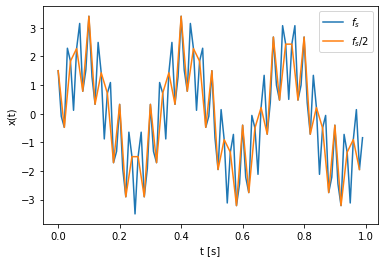

In [5]:
plt.plot(t, x, label='$f_s$')
plt.plot(t_2, x_2, label='$f_s/2$')
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.legend();

In [6]:
X = np.fft.rfft(x) / len(x)
X[1:] *= 2
freq = np.fft.rfftfreq(len(x), dt)

In [7]:
X_2 = np.fft.rfft(x_2) / len(x_2)
X_2[1:] *= 2
freq_2 = np.fft.rfftfreq(len(x_2), t_2[1])

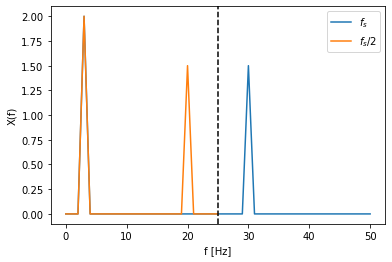

In [8]:
plt.plot(freq, np.abs(X), label='$f_s$')
plt.plot(freq_2, np.abs(X_2), label='$f_s/2$')
plt.axvline(x=fs_2 / 2, c='k', ls='--')
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.legend();

#### Filtriranje za odpravo frekvenčnega nalaganja

Frekvenčno nalaganje merjenega signala lahko preprečimo z uporabo nizkopasovnega filtriranja (ang. *anti-aliasing filter*), ki mora biti izvedeno *pred časovnim vzorčenjem signala*.

:::{admonition} Naloga 2 (10 minut)
:class: seealso
Na zgornjem primeru signala $x(t)$ prikažimo uporabo *anti-aliasing* filtriranja z uporabo `scipy.signal`.
:::

In [9]:
from scipy import signal

Priprava digitalnega nizkoprepustnega filtra:

In [10]:
f_cutoff = 20
sos = signal.butter(3, f_cutoff, 'low', analog=False, fs=fs, output='sos')
w, h = signal.sosfreqz(sos, freq, whole=False, fs=fs)

C:\Users\Domen\AppData\Local\Temp/ipykernel_8592/1568578183.py:2: RuntimeWarning: divide by zero encountered in log10
  ax.plot(freq, 20*np.log10(np.abs(h)), c='k')


Text(0, 0.5, 'X(f)')

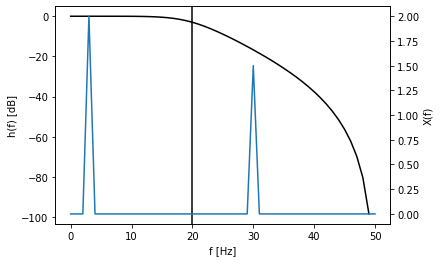

In [11]:
fig, ax = plt.subplots()
ax.plot(freq, 20*np.log10(np.abs(h)), c='k')
ax.axvline(f_cutoff, c='k')
ax2 = ax.twinx()
ax2.plot(freq, np.abs(X))
ax.set_xlabel('f [Hz]')
ax.set_ylabel('h(f) [dB]')
ax2.set_ylabel('X(f)')

Filtriranje signala

In [12]:
x_filtered = signal.sosfilt(sos, x)
x_f_2 = x_filtered[::2]

In [13]:
X_f = np.fft.rfft(x_filtered) / len(x_filtered)
X_f[1:] *= 2

X_f_2 = np.fft.rfft(x_f_2) / len(x_f_2)
X_f_2[1:] *= 2

C:\Users\Domen\AppData\Local\Temp/ipykernel_8592/1088635885.py:2: RuntimeWarning: divide by zero encountered in log10
  ax.plot(freq, 20*np.log10(np.abs(h)), c='k')


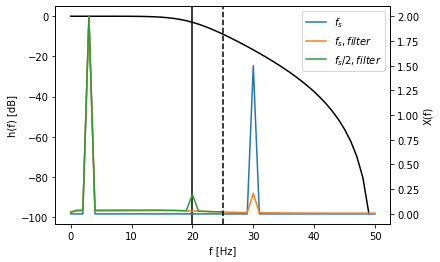

In [14]:
fig, ax = plt.subplots()
ax.plot(freq, 20*np.log10(np.abs(h)), c='k')
ax.axvline(f_cutoff, c='k')

ax2 = ax.twinx()
ax2.plot(freq, np.abs(X), label='$f_s$')
ax2.plot(freq, np.abs(X_f), label='$f_s, filter$')
ax2.plot(freq_2, np.abs(X_f_2), label='$f_s/2, filter$')
ax2.axvline(x=fs_2 / 2, c='k', ls='--')
ax.set_xlabel('f [Hz]')
ax.set_ylabel('h(f) [dB]')
ax2.set_ylabel('X(f)')
ax2.legend();

### Kvantizacija

Kvantizacija je postopek diskretizacije *odvisne spremenljivke* zveznega procesa $x(t)$. 

Glavni parameter časovnega vzorčenja je **število diskretnih nivojev**, ki jih odvisna spremenljivka pri procesu kvantizacije lahko zavzame, ki določa **dinamični razpon** (globino) procesa. Običajno je podano s **številom bitov** $b$ AD pretvornika. Prav tako je pri tem pomembno območje kvanzizacije $A = x_{\text{max}} - x_{\text{min}}$, ki določa interval možnih vrednosti neodvisne spremenljivke $x \in [x_{\text{min}}, x_{\text{max}}]$.

Število diskretnih vrednosti kvantiziranega signala je:

$$N = 2^b$$

Napako kvantizacije lahko modeliramo kot naključni šum normalne porazdelitve s standardno deviacijo:

$$\sigma_e = \frac{A/2^b}{\sqrt{12}}$$

*Dinamični razpon* meritve je določen z razmerjem med koristnim signalom in šumom (napako kvantizacije), *SNR* (*Signal-Nosie Ratio*):

$$SNR = 10 \, \log_{10} \, \frac{\sigma_x^2}{\sigma_e^2} = 20 \, \log_{10} \, \frac{\sigma_x}{\sigma_e} \approx 6\,b - 1.25 dB $$

(ob predpostavki $\sigma_x = A/4$, da ne dosežemo mej dovoljenga intervala neodvisne spremenljivke).

:::{admonition} Naloga 3 (10 minut)
:class: seealso

Na primeru signala $x(t)$ iz naloge 1 simulirajmo vpliv kvantizacije signala s parametri:

$x \in [-20, 20]\\$
$b = 6$

:::

In [15]:
adc_range = [-20, 20]
A = np.max(adc_range) - np.min(adc_range) 
b = 6
std_e = (A/2**b) / np.sqrt(12)
std_x = A/4

In [16]:
SN = 10 * np.log10(std_x**2 / std_e**2)
SN

34.874212113594744

In [17]:
6*b - 1.25

34.75

In [18]:
def get_quantized(x, bits=4, adc_range=(-20, 20)):
    """
    Kvantizacija signala `x` z izbranimi parametri (s predavanj).
    """
    x2 = x.copy()
    lo, hi = adc_range
    x2[x<=lo] = lo
    x2[x>=hi] = hi
    delta = (hi - lo) / (2**(bits)-1)
    qnt = lo + delta*np.floor((x2 - lo) / delta)
    return qnt


Kvantiziran signal

In [19]:
x_kvantiziran = get_quantized(x, b, adc_range)

Signal s šumom

In [20]:
x_šum = x + np.random.randn(len(x))*std_e

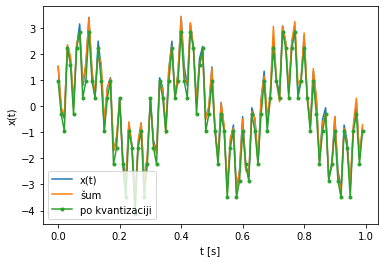

In [21]:
plt.plot(t, x, label='x(t)')
plt.plot(t, x_šum, label='šum')
plt.plot(t, x_kvantiziran, '.-', label='po kvantizaciji')
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.legend();

In [22]:
X_k = np.fft.rfft(x_kvantiziran) / len(x_kvantiziran) 
X_k[1:] *= 2

X_šum = np.fft.rfft(x_šum) / len(x_šum) 
X_šum[1:] *= 2

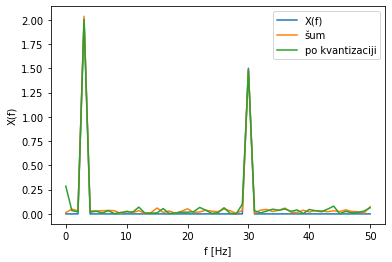

In [23]:
plt.plot(freq, np.abs(X), label='X(f)')
plt.plot(freq, np.abs(X_šum), label='šum')
plt.plot(freq, np.abs(X_k), label='po kvantizaciji')
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.legend();

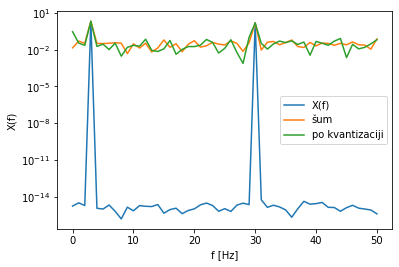

In [24]:
plt.semilogy(freq, np.abs(X), label='X(f)')
plt.semilogy(freq, np.abs(X_šum), label='šum')
plt.semilogy(freq, np.abs(X_k), label='po kvantizaciji')
plt.xlabel('f [Hz]')
plt.ylabel('X(f)')
plt.legend();
